# 第1章 统计学习及监督学习概论

## 例1.1（P21）的实现
用目标函数$y=sin2{\pi}x$, 加上一个正态分布的噪音干扰，用多项式去拟合

In [8]:
import numpy as np 
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def real_func(x):
    return (np.sin(2 * x * np.pi))

def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

def residuals(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [10]:
#生成十个点
x = np.linspace(0, 1, 10)
#用于绘图
x_points = np.linspace(0, 1, 1000)
y_0 = real_func(x)
#含噪音的结果
y = [np.random.normal(0, 0.1) + y0 for y0 in y_0]

#生成M次多项式
def fitting(M = 0):
    p_init = np.random.rand(M + 1)
    p_lsq = leastsq(residuals, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

**M = 0**

Fitting Parameters: [-0.01711108]


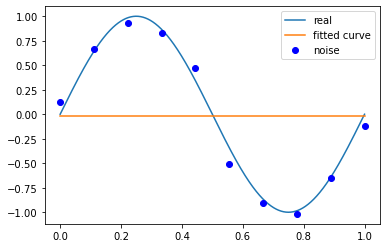

In [11]:
p_lsq_0 = fitting(M=0)

**M = 1**

Fitting Parameters: [-1.49063575  0.7282068 ]


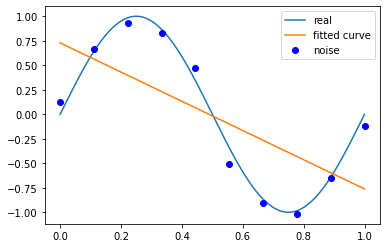

In [12]:
p_lsq_1 = fitting(M=1)

**M = 3**

Fitting Parameters: [ 20.10322471 -29.98809501   9.78408712   0.05798304]


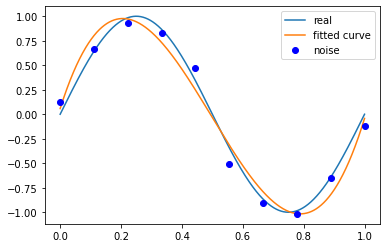

In [13]:
p_lsq_3 = fitting(M=3)

**M= 9**

Fitting Parameters: [-3.95232346e+04  1.77700228e+05 -3.34984731e+05  3.43569493e+05
 -2.08042339e+05  7.54687825e+04 -1.58425530e+04  1.72203088e+03
 -6.79174126e+01  1.25988461e-01]


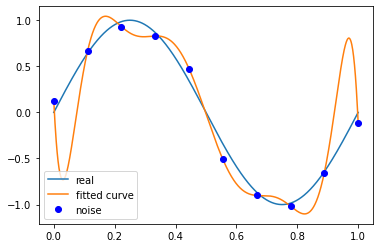

In [14]:
p_lsq_9 = fitting(M=9)

此时，虽然拟合的多项式能通过所有的点，但是显然已经**过拟合**。当发生过拟合时，训练误差会减小，但是测试误差会增大。

## Hoeffding（霍夫丁）不等式
令$X_1, X_2, \ldots, X_N$是独立随机变量，且$X_i \in \{a_i, b_i\}$;$\bar{X}$是$X_1, X_2, \ldots, X_N$的均值，则对于任意$t>0$,下列不等式成立：
$$
P[\bar{X} - E(\bar{X}) \geqslant t] \leqslant \exp(- \frac{2N^2t^2}{\sum_{i=1}^N(b_i - a_i)^2})
$$
$$
P[E(\bar{X}) - \bar{X} \geqslant t] \leqslant \exp(- \frac{2N^2t^2}{\sum_{i=1}^N(b_i - a_i)^2})
$$

## 习题1
### 1.1 说明伯努利模型的极大似然估计以及贝叶斯估计中的统计学习方法三要素
伯努利模型是定义在取值为0或1的随机变量上的概率分布。假设观测到伯努利模型n次独立的数据生成结果，其中k次的结果为1，这时可以用极大似然估计或贝叶斯估计来估计结果为1的概率

1. 极大似然估计:

    模型：$\mathcal{F} = \{f | f_p(x) = p^x(1-p)^{(1-x)} \}$

    策略：似然函数的最大化
    
    算法：$\displaystyle \mathop{\arg\max}_{p} L(p)= \mathop{\arg\max}_{p} \binom{n}{k}p^k(1-p)^{(n-k)}$

    **解法**：

    伯努利模型的似然函数

    $$
    L(p|x) = p(X = x | p) = \binom{n}{k}p^k(1-p)^{(n-k)}
    $$

    对上述式子两边求导，得：

    $$
    0 = \binom{n}{k} (kp^{k-1}(1-p)^{(n-k)}-(n-k)p^{k}(1-p)^{(n-k-1)})
    $$

    解得$p = \frac{k}{n}$

2. 贝叶斯估计：

    模型：$\mathcal{F} = \{f | f_p(x) = p^x(1-p)^{(1-x)} \}$

    策略：求参数期望

    算法： 
    \begin{aligned}
            E_\pi\big[p \big| y_1,\cdots,y_n\big]
              & = {\int_0^1}p\pi (p|y_1,\cdots,y_n) dp \\
              & = {\int_0^1} p\frac{f_D(y_1,\cdots,y_n|p)\pi(p)}{\int_{\Omega}f_D(y_1,\cdots,y_n|p)\pi(p)dp}dp \\
              & = {\int_0^1}\frac{p^{k+1}(1-p)^{(n-k)}}{\int_0^1 p^k(1-p)^{(n-k)}dp}dp
    \end{aligned}

### 1.2 通过经验风险最小化推导极大似然估计
证明模型是条件概率模型，当损失函数是对数损失函数时，经验风险最小化等价于极大似然估计

**证明**：

设模型的条件概率分布为$P_{\theta} (Y|X)$,极大似然估计的似然函数为：
$$
L(\theta) = \prod_D P_{\theta}(Y|X)
$$

对上述式子两边求对数，得：

$$
\ln L(\theta) = \sum_D \ln P_{\theta}(Y|X) \\ 
\mathop{\arg \max}_{\theta} \sum_D \ln P_{\theta}(Y|X) = \mathop{\arg \min}_{\theta} \sum_D (- \ln P_{\theta}(Y|X))
$$ 

得证.